<h3 style="font-size:1.5em;color:#FF33EC">Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from collections import Counter
import nltk
import string
import pickle
import re
import ast

from wordcloud import WordCloud
from nltk.classify import NaiveBayesClassifier

In [2]:
#can we predict number of view or popularity based on tags/or based on speaker occupation

<h3 style="font-size:1.5em;color:#FF33EC">Loading Data</h3>

In [3]:
data=pd.read_csv('ted_main.csv')


In [4]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


<h3 style="font-size:1.5em;color:#FF33EC">Data Cleaning</h3>

In [5]:
data.isnull().any()

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

In [6]:
data.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [7]:
data.shape

(2550, 17)

In [8]:
#not droping null values,keeping the null speakers
# data=data.dropna()
# data.shape

<h3 style="font-size:1.5em;color:#FF33EC">Data Exploration</h3>

In [9]:
data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [10]:
#checking the most viewed TED Talks
#data.sort_values('views',ascending=False).head()

In [11]:
#exploring the ratins
data.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [12]:
data.ratings.shape[0]

2550

<h1 style="font-size:2em;color:#FF33EC">Data PreProccesing</h1>

<h3 style="font-size:1.5em;color:#FF33EC">Extracting words of comments and their frequency</h3>

In [13]:
#a function to extract dict
def get_literal(data):
    '''
    returns the extracted dic from string
    '''
    x = ast.literal_eval(re.search('({.+})', data).group(0))
    return x

In [14]:
#a function to extract name and its count
def ratings_dict(x):
    '''
    return a dictionary with words & counts in ratings
    '''
    ratings_dict=dict()
    for d in x:
        key=d['name']
        value=d['count']
   
        ratings_dict[key]=value
    return ratings_dict

In [15]:
#adding a column to save extracted words and count
data['words_of_comments']='word'

In [22]:
data.tail(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,words_of_comments
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,word
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,word


In [25]:
#creating a list of words and frequency for each TED Talk and to use later for sentiment analysis
list_of_dict=[]
for rating in data.ratings:
    list_of_dict.append(ratings_dict(get_literal(rating)))
    
len(list_of_dict)
   


2550

In [26]:
#testing to see if comments words are correctly extracted
list_of_dict[:1]

[{'Funny': 19645,
  'Beautiful': 4573,
  'Ingenious': 6073,
  'Courageous': 3253,
  'Longwinded': 387,
  'Confusing': 242,
  'Informative': 7346,
  'Fascinating': 10581,
  'Unconvincing': 300,
  'Persuasive': 10704,
  'Jaw-dropping': 4439,
  'OK': 1174,
  'Obnoxious': 209,
  'Inspiring': 24924}]

In [27]:
#building data.words column with comment and frequency
for i in range(len(list_of_dict)):
    data['words_of_comments'][i]=list_of_dict[i]
    

C:\Users\fayal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
data.words_of_comments[:1]

0    {'Funny': 19645, 'Beautiful': 4573, 'Ingenious...
Name: words_of_comments, dtype: object

In [29]:
print('There are:',len(data.main_speaker.unique().tolist()), 'main speakers.')

There are: 2156 main speakers.


In [30]:
print('There are:',len(data.speaker_occupation.unique().tolist()), 'speaker occupations.')

There are: 1459 speaker occupations.


There are 2544 rows in data and 2150 speakers. So, that means some speakers have held TED Talk more than once.

In [31]:
#we don't need the url
del data['url']

<h3 style="font-size:1.5em;color:#FF33EC">Parsing date</h3>

In [32]:
#let's parse the film date and publish date
data['film_date']=pd.to_datetime(data['film_date'],unit='s')
data['film_date'][:10]

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
5   2006-02-02
6   2006-02-24
7   2006-02-23
8   2006-02-02
9   2006-02-25
Name: film_date, dtype: datetime64[ns]

In [33]:
#since we are interested to explor film date only, we will delete published date from dataframe
del data['published_date']

In [34]:
data['film_date'].describe()

count                    2550
unique                    735
top       2017-04-24 00:00:00
freq                       64
first     1972-05-14 00:00:00
last      2017-08-27 00:00:00
Name: film_date, dtype: object

In [35]:
#exploring range of years 
range_years=sorted(data['film_date'].dt.year.unique().tolist())
print(range_years)

[1972, 1983, 1984, 1990, 1991, 1994, 1998, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [36]:
#extracting year from film date
data['year']=data['film_date'].dt.year
data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,views,words_of_comments,year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,"{'Funny': 19645, 'Beautiful': 4573, 'Ingenious...",2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,"{'Funny': 544, 'Courageous': 139, 'Confusing':...",2006


In [37]:
#changing duration from second to minute
data['length_minute']=(data['duration']/60).round()

data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,views,words_of_comments,year,length_minute
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,"{'Funny': 19645, 'Beautiful': 4573, 'Ingenious...",2006,19.0
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,"{'Funny': 544, 'Courageous': 139, 'Confusing':...",2006,16.0


<h3 style="font-size:2em;color:#FF33EC">Data Visualization</h3>

https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html

In [38]:
data['length_minute'].describe()

count    2550.000000
mean       13.777255
std         6.249848
min         2.000000
25%        10.000000
50%        14.000000
75%        17.000000
max        88.000000
Name: length_minute, dtype: float64

In [39]:
#which TEDtalk has maximum views
data[data['views']==data.views.max()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,views,words_of_comments,year,length_minute
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,"{'Funny': 19645, 'Beautiful': 4573, 'Ingenious...",2006,19.0


In [40]:
type(data.views[0])

numpy.int64

<h3 style="font-size:1.5em;color:#FF33EC">History: Events per year</h3>

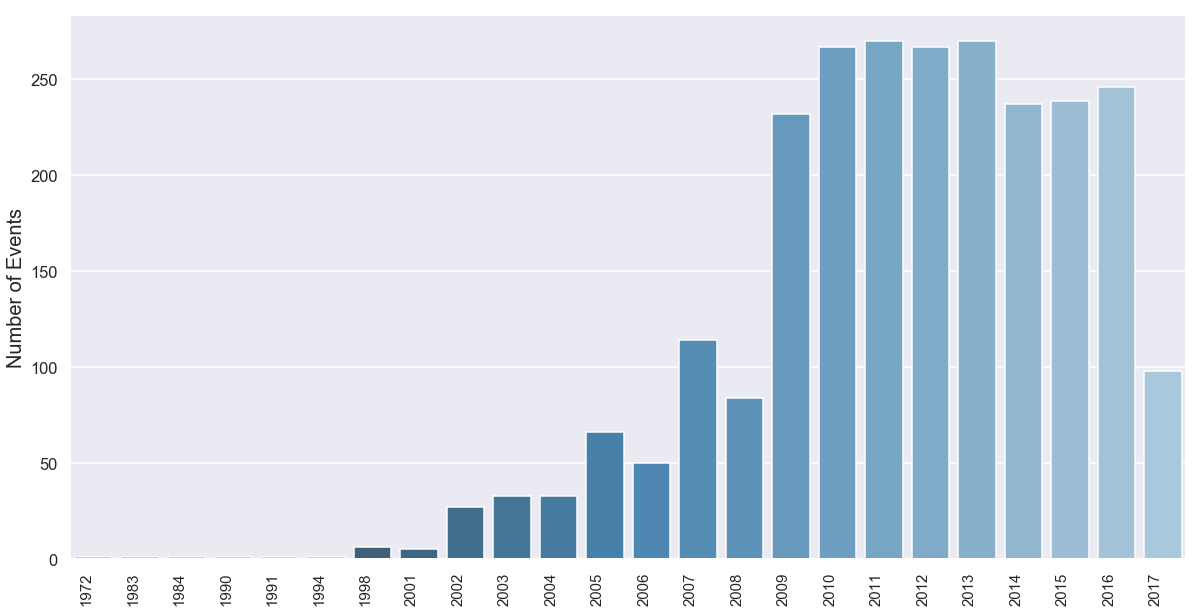

In [41]:
#plotting number of events per year

sns.set(style="darkgrid",context='talk')


fig, ax = plt.subplots(figsize=(20,10))


sns.countplot(x='year',data=data[['event','year']],palette='Blues_d')

ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,rotation=90, ha="right")

ax.set_xlabel('')
ax.set_ylabel('Number of Events',fontsize=20)

plt.savefig('history of TED Talks.jpeg')
plt.show()

It is possible that the data does not have all the TED events in 2017.

<h3 style="font-size:1.5em;color:#FF33EC">Correlation of comments and views</h3>

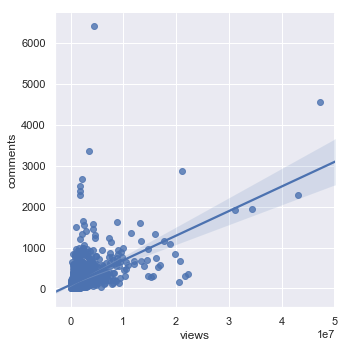

In [42]:
sns.set(style="darkgrid")



sns.lmplot(x='views', y='comments', data=data,x_jitter=.05)

plt.show()

<h3 style="font-size:1.5em;color:#FF33EC">Most Viewed Talks</h3>

In [43]:
most_viewed=data.sort_values('views',ascending=False).head(10)
most_viewed.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,views,words_of_comments,year,length_minute
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,"{'Funny': 19645, 'Beautiful': 4573, 'Ingenious...",2006,19.0
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,2012-06-26,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,43155405,"{'Jaw-dropping': 3586, 'Informative': 9787, 'F...",2012,21.0


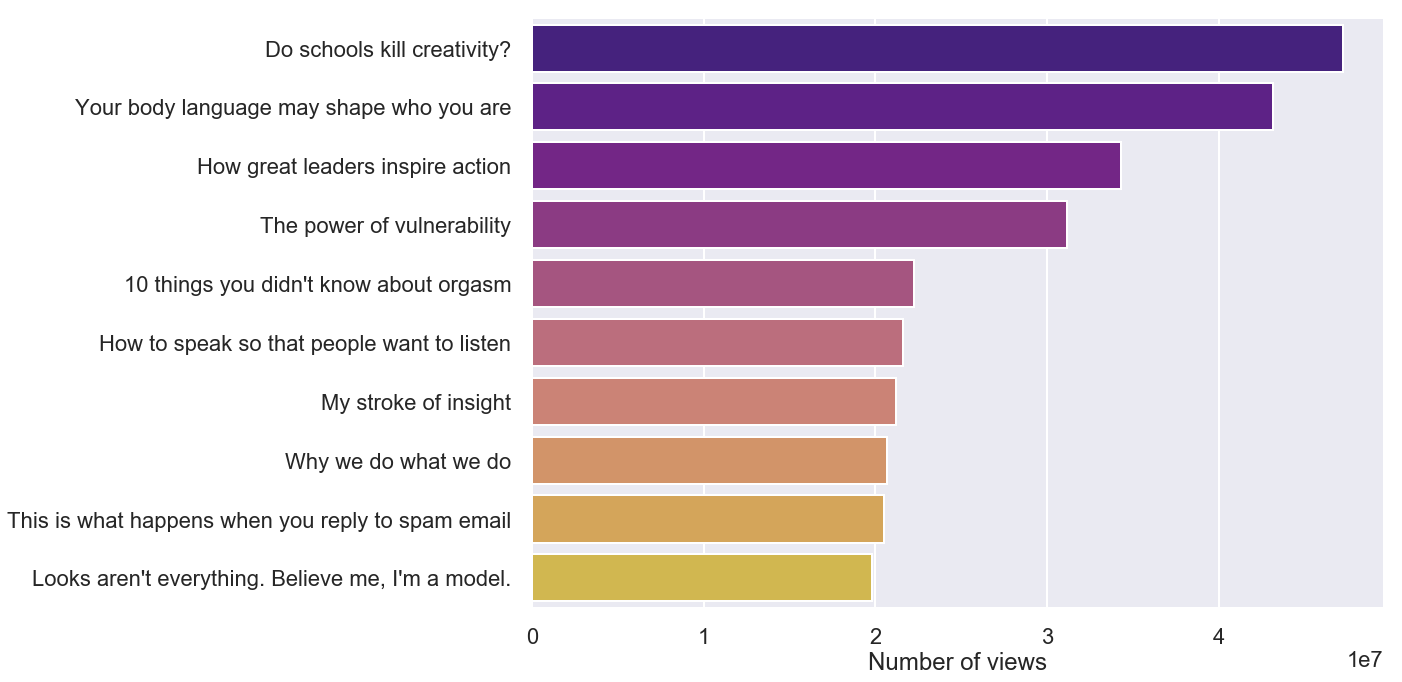

In [44]:
#plotting the most viewed
#most_viewed=data[['title','views','main_speaker','year']].sort_values('views',ascending=False).head(10)

sns.set(style="darkgrid",context='poster')


plt.figure(figsize=(20,10))
sns.barplot(x=most_viewed.views,y=most_viewed.title,palette='plasma',saturation=0.6)

#plt.title('The most popular TED Talks')
plt.xlabel('Number of views')
plt.ylabel('')

sns.despine(offset=5,trim=True)
plt.tight_layout()

plt.savefig('most_popular_TT.jpeg')
plt.show()

<h3 style="font-size:1.5em;color:#FF33EC">Most Popular Speakers, Occupation of speakers</h3>

In [45]:
speaker=most_viewed[['title','main_speaker','speaker_occupation']]
speaker

,title,main_speaker,speaker_occupation
0,Do schools kill creativity?,Ken Robinson,Author/educator
1346,Your body language may shape who you are,Amy Cuddy,Social psychologist
677,How great leaders inspire action,Simon Sinek,Leadership expert
837,The power of vulnerability,Brené Brown,Vulnerability researcher
452,10 things you didn't know about orgasm,Mary Roach,Writer
1776,How to speak so that people want to listen,Julian Treasure,Sound consultant
201,My stroke of insight,Jill Bolte Taylor,Neuroanatomist
5,Why we do what we do,Tony Robbins,Life coach; expert in leadership psychology
2114,This is what happens when you reply to spam email,James Veitch,Comedian and writer
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,Model


<h4 style="font-size:1.5em;color:#FF33EC">Topics/ Tags,using nltk tokenizer</h4>

In [46]:
#exploring
data.tags.value_counts()[:15]

['live music', 'music', 'performance']                                   3
['entertainment', 'live music', 'music', 'performance']                  3
['art', 'creativity']                                                    3
['cities', 'culture', 'design', 'transportation']                        2
['demo', 'design', 'interface design', 'technology']                     2
['TEDx', 'inequality', 'race', 'social change', 'society']               2
['creativity', 'entertainment', 'live music', 'music', 'performance']    2
['business', 'technology']                                               2
['architecture', 'cities', 'design', 'infrastructure']                   2
['mission blue', 'oceans', 'science', 'technology']                      2
['culture', 'technology']                                                2
['charter for compassion', 'compassion', 'global issues', 'religion']    2
['TED Fellows', 'photography', 'war']                                    2
['culture', 'love', 'rela

In [47]:
data.tags[0]

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

In [48]:
data.tags[0].split(',')

["['children'",
 " 'creativity'",
 " 'culture'",
 " 'dance'",
 " 'education'",
 " 'parenting'",
 " 'teaching']"]

In [49]:
#testing the function:
l=[]
w=''
for x in data.tags[0].split(','):
    for char in x:
        if not char in string.punctuation:
            w+=char
    l.append(w)
    w=''
print(l,len(l))

['children', ' creativity', ' culture', ' dance', ' education', ' parenting', ' teaching'] 7


In [50]:
data['tags'].shape[0]

2550

In [51]:
data['theme']='theme'

In [52]:

for i in range(data['tags'].shape[0]):
    
    l=[]
    w=''
   
    for x in data.tags[i].split(','):
        for char in x:
            if not char in string.punctuation:
                w+=char
        l.append(w)
        w=''
    data['theme'][i]=l
    
 

C:\Users\fayal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [53]:
data['theme'].head()

0    [children,  creativity,  culture,  dance,  edu...
1    [alternative energy,  cars,  climate change,  ...
2    [computers,  entertainment,  interface design,...
3    [MacArthur grant,  activism,  business,  citie...
4    [Africa,  Asia,  Google,  demo,  economics,  g...
Name: theme, dtype: object

In [61]:
#combining all tags in one list to feed the Counter object
list_tags=[]
for i in range(data.theme.shape[0]):
    list_tags.extend(data.theme[i])

In [62]:
len(list_tags)

19154

In [63]:
count_tags=Counter(list_tags)
most_common_tags=count_tags.most_common()[:10]

In [64]:
type(most_common_tags)

list

In [65]:
#combining all words in tags column and making a text blob
# all_words_of_tags=''
# for tag in data.tags:
#     all_words_of_tags+=tag
# all_words_of_tags[:30]#testing if geting a blob of text from tag col works

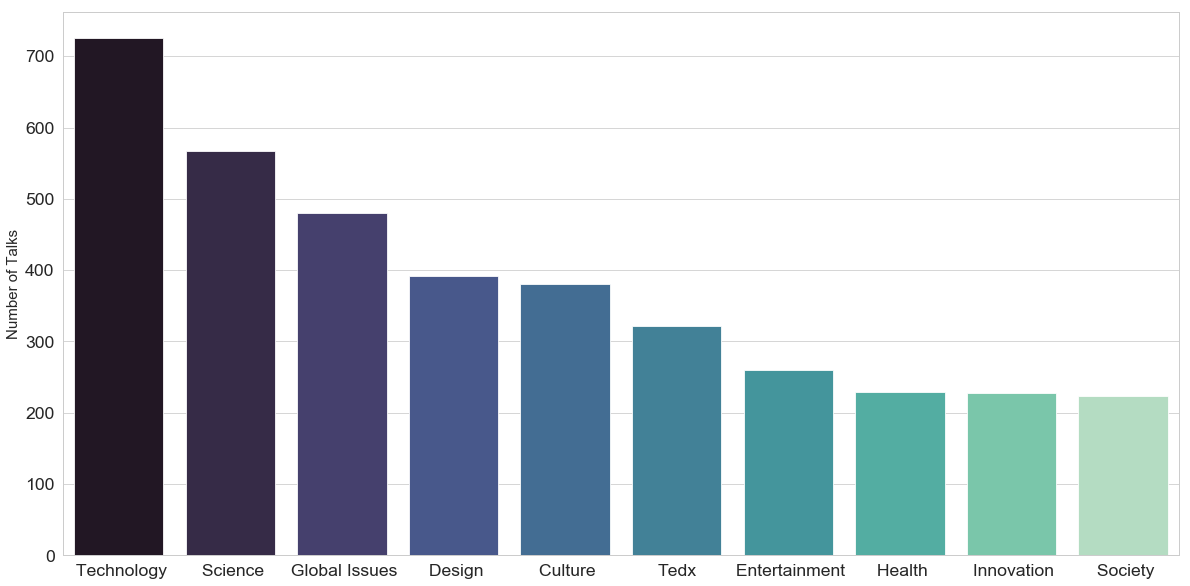

In [66]:

sns.set(style='whitegrid',font_scale = 2,context='paper')
plt.figure(figsize=(20,10))
x=[]
y=[]

for i in range(len(most_common_tags)):
    x.append(most_common_tags[i][0].title())
    y.append(most_common_tags[i][1])
    
#plt.stem(x,y)
sns.barplot(x,y,palette='mako')

#plt.title('Most Popular Topics')
plt.xlabel('')
plt.ylabel('Number of Talks',fontsize=15)

plt.savefig('most popular topics.jpeg')
plt.show()

In [67]:

print(x)
print(y)

[' Technology', ' Science', ' Global Issues', ' Design', ' Culture', 'Tedx', ' Entertainment', ' Health', ' Innovation', ' Society']
[726, 567, 480, 392, 380, 322, 260, 229, 228, 224]


In [68]:
data.theme[:2]

0    [children,  creativity,  culture,  dance,  edu...
1    [alternative energy,  cars,  climate change,  ...
Name: theme, dtype: object

<h3 style="font-size:1.5em;color:#FF33EC">Duration of Talks, based on topic</h3>

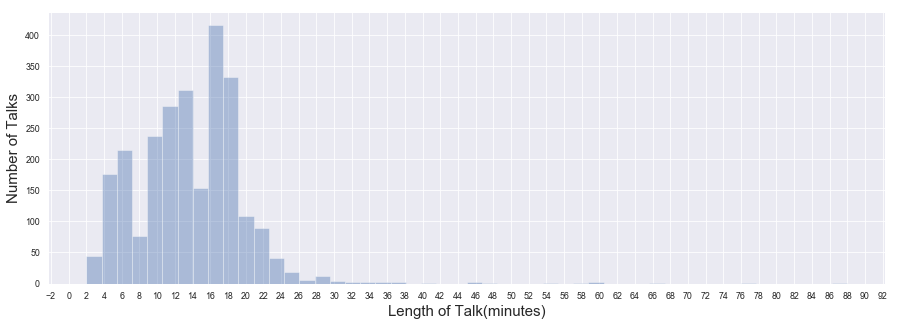

In [69]:
#plotting the distribution of length of Talk
sns.set(style="darkgrid",context='paper')
fig, ax = plt.subplots(figsize=(15,5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

sns.distplot(data['length_minute'],norm_hist=False,kde=False,bins=50)


ax.set_xlabel('Length of Talk(minutes)',fontsize=15)
ax.set_ylabel('Number of Talks',fontsize=15)
plt.show()

As TED Talk must be around 18 minutes, histogram shows the distribution confirm it. There are some outliers though.

In [70]:
topics=[]
for topic in x:
    topics.append(topic.lower())
topics

[' technology',
 ' science',
 ' global issues',
 ' design',
 ' culture',
 'tedx',
 ' entertainment',
 ' health',
 ' innovation',
 ' society']

In [71]:
length_of_topics=pd.DataFrame({'length':np.repeat(data.length_minute.values,data.theme.str.len()),
                              'topic': np.concatenate(data.theme.values)})

In [72]:
filtered_topics=length_of_topics[length_of_topics.topic.isin(topics)]
filtered_topics.shape

(3486, 2)

In [73]:
filtered_topics.length.describe()

count    3486.000000
mean       14.025531
std         5.939647
min         2.000000
25%        10.000000
50%        14.000000
75%        18.000000
max        66.000000
Name: length, dtype: float64

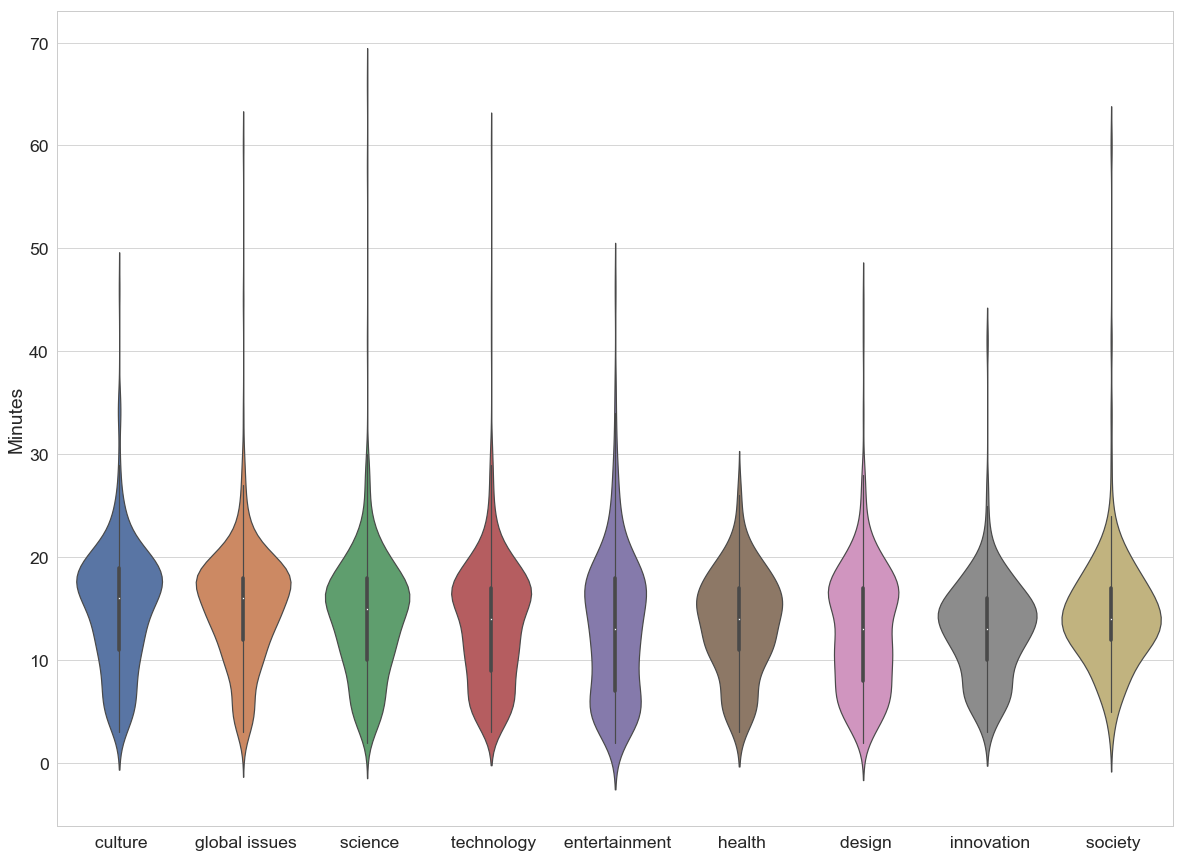

In [74]:
sns.set(style='whitegrid',font_scale = 2,context='paper')

plt.figure(figsize=(20,15))
sns.violinplot(x='topic',y='length',data=filtered_topics,kind='violin')

plt.xlabel("")
plt.ylabel('Minutes')

plt.savefig('Duration of Talk')
plt.show()

<h4 style="font-size:1.5em;color:#FF33EC">Speaker Occupation</h4>

In [75]:
print('There are:',len(data.speaker_occupation.unique().tolist()),'occupation among speakers.')

There are: 1459 occupation among speakers.


In [76]:
print('There are :', len(data.main_speaker.unique().tolist()),'speakers and ', data.shape[0], 'TED Talks.')

There are : 2156 speakers and  2550 TED Talks.


*Some speakers have had more than one TED Talk.*

In [77]:
occu=data.speaker_occupation.value_counts()[:15]

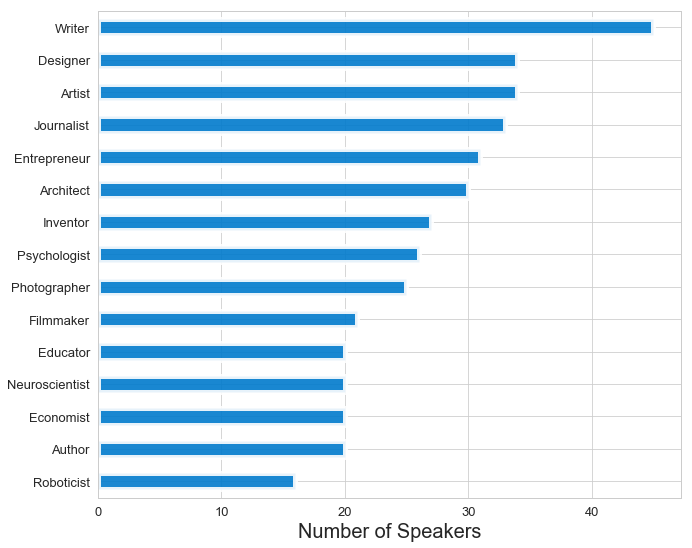

In [78]:
#data.speaker_occupation.value_counts()[:15].plot(kind='barh')

fig, ax = plt.subplots(figsize=(25,15))




occu.plot(kind='barh', figsize=(10,8),color='#007acc', alpha=0.9, linewidth=5,fontsize=13)
plt.gca().invert_yaxis()
plt.xlabel('Number of Speakers',fontsize=20)
plt.tight_layout()
plt.savefig('most_popular_occupation.png')

plt.show()

In [79]:
#the most common occupation
speakers_occupations=dict(data.speaker_occupation.value_counts())
sum(speakers_occupations.values())

2544

In [80]:
len(speakers_occupations.keys())

1458

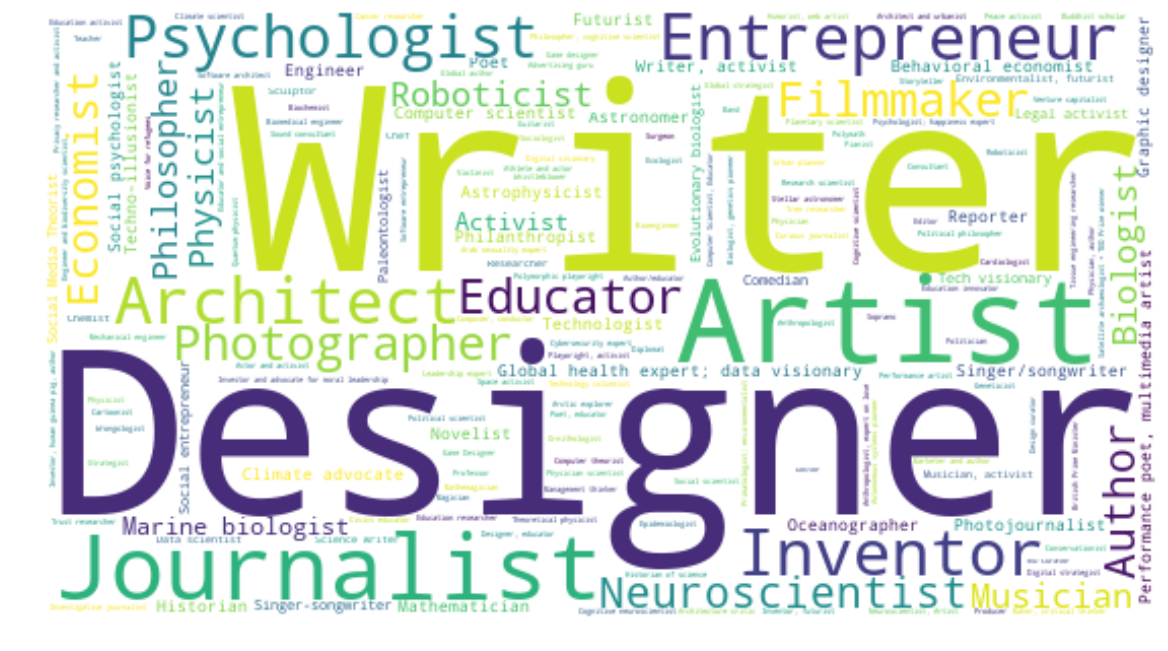

In [81]:


f, ax = plt.subplots(figsize=(20, 20))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=5000,relative_scaling=0.1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(speakers_occupations)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.tight_layout
plt.savefig('wordcloud.png')

plt.show()

<h4 style="font-size:1.5em;color:#FF33EC">occupation of speakers who have attracted the most viewers?</h4>

In [82]:
occ_with_most_views=data.groupby('speaker_occupation',as_index=False)['views'].sum()
top_occu=occ_with_most_views.sort_values('views',ascending=False)[:15]
top_occu

,speaker_occupation,views
1426,Writer,133549303
1131,Psychologist,90851398
142,Author/educator,63006281
515,Entrepreneur,61764022
1257,Social psychologist,56813602
781,Leadership expert,48203767
753,Journalist,47860783
413,Designer,43294187
924,Neuroscientist,40889730
1408,Vulnerability researcher,39157044


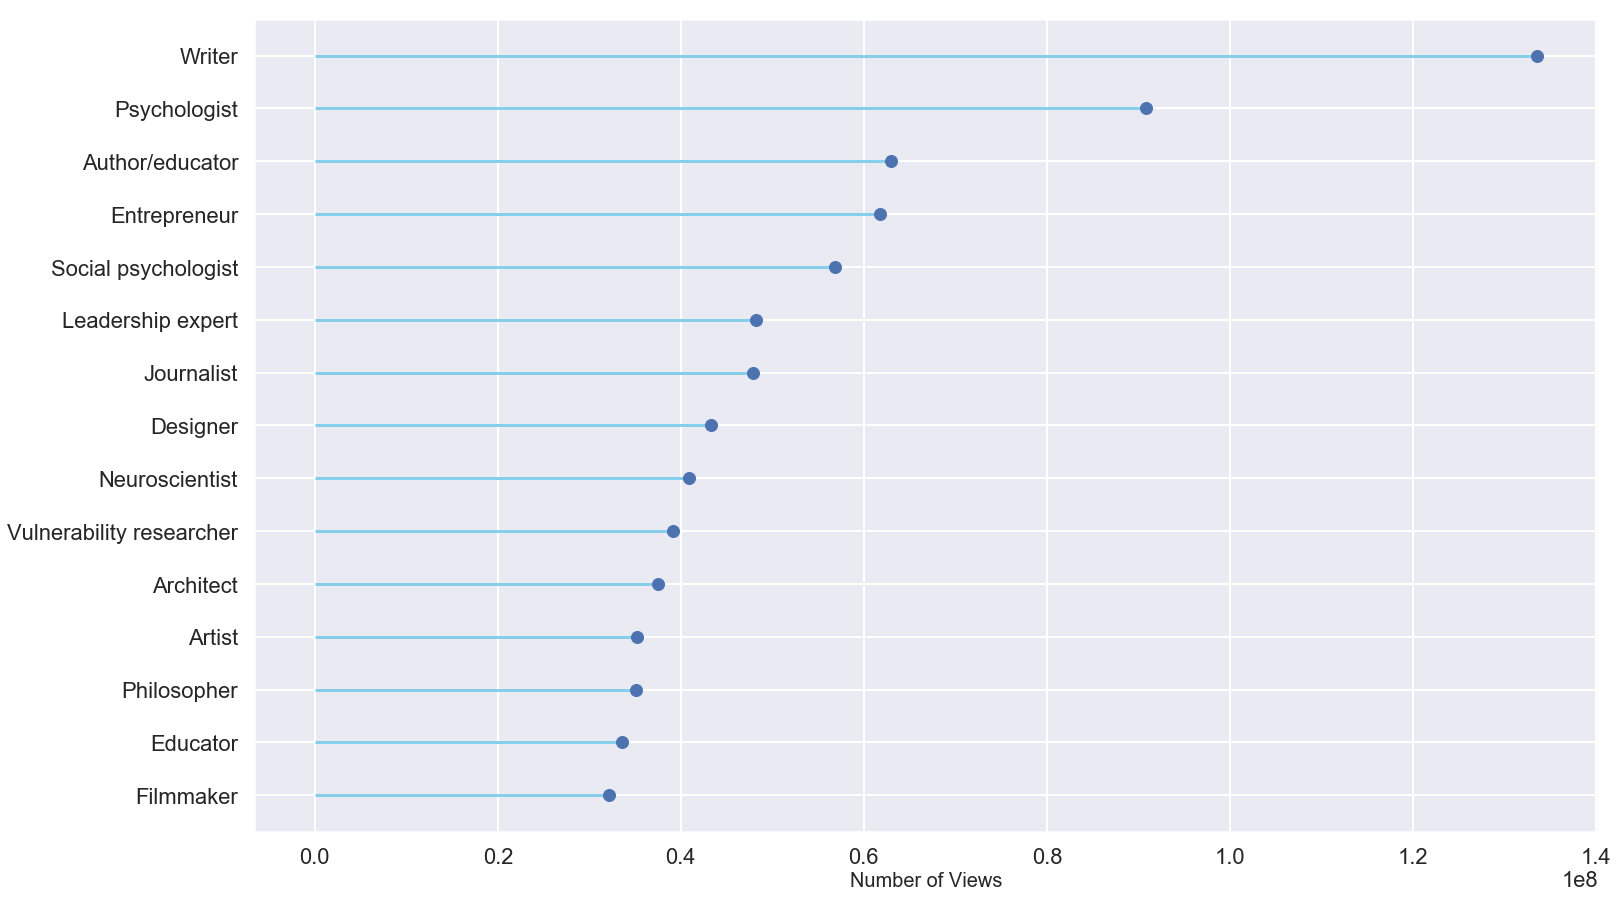

In [83]:
sns.set(style='darkgrid',context='poster')

plt.figure(figsize=(23,13))

plt.hlines(y=top_occu.speaker_occupation,xmin=0,xmax=top_occu.views,color='skyblue')
plt.plot(top_occu.views,top_occu.speaker_occupation,"o")



plt.xlabel('Number of Views',fontsize=20)

plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('occu_w_most_views.jpeg')
plt.show()

### Who is this Vulnerability researcher poping up here? ###

In [84]:
data[data['speaker_occupation']=='Vulnerability researcher'][['main_speaker','title','views']]

,main_speaker,title,views
837,Brené Brown,The power of vulnerability,31168150
1177,Brené Brown,Listening to shame,7988894


In [85]:
len(data[data['speaker_occupation']=='Neuroscientist']['main_speaker'].unique().tolist())

18

<h4 style="font-size:1.5em;color:#FF33EC">Languages Translated To</h4>

In [86]:
most_translated=data.sort_values('languages',ascending=False)[:15]
most_translated.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,views,words_of_comments,year,length_minute,theme
973,736,"Is there something you've always meant to do, ...",207,TED2011,2011-03-03,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",Technologist,"['culture', 'success']",Try something new for 30 days,8838874,"{'Inspiring': 6171, 'Persuasive': 1977, 'Funny...",2011,3.0,"[culture, success]"
606,238,"""There's a flip side to everything,"" the sayin...",162,TEDIndia 2009,2009-11-06,69,Derek Sivers,"Derek Sivers: Weird, or just different?",1,"[{'id': 7, 'name': 'Funny', 'count': 924}, {'i...","[{'id': 485, 'hero': 'https://pe.tedcdn.com/im...",Entrepreneur,"['business', 'creativity', 'map']","Weird, or just different?",2835976,"{'Funny': 924, 'Fascinating': 558, 'Persuasive...",2009,3.0,"[business, creativity, map]"
47,578,Why do people succeed? Is it because they're s...,210,TED2005,2005-02-23,66,Richard St. John,Richard St. John: 8 secrets of success,1,"[{'id': 7, 'name': 'Funny', 'count': 2966}, {'...","[{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...","Marketer, success analyst","['business', 'culture', 'entertainment', 'happ...",8 secrets of success,10841210,"{'Funny': 2966, 'Beautiful': 576, 'Unconvincin...",2005,4.0,"[business, culture, entertainment, happines..."
653,422,"With help from some surprising footage, Derek ...",189,TED2010,2010-02-11,65,Derek Sivers,Derek Sivers: How to start a movement,1,"[{'id': 9, 'name': 'Ingenious', 'count': 929},...","[{'id': 755, 'hero': 'https://pe.tedcdn.com/im...",Entrepreneur,"['business', 'dance', 'entertainment', 'leader...",How to start a movement,6475731,"{'Ingenious': 929, 'Inspiring': 2417, 'Persuas...",2010,3.0,"[business, dance, entertainment, leadership..."
479,398,"Someone always asks the math teacher, ""Am I go...",178,TED2009,2009-02-05,64,Arthur Benjamin,Arthur Benjamin: Teach statistics before calcu...,1,"[{'id': 25, 'name': 'OK', 'count': 282}, {'id'...","[{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...",Mathemagician,"['economics', 'education', 'math', 'statistics']",Teach statistics before calculus!,2175141,"{'OK': 282, 'Persuasive': 1116, 'Funny': 159, ...",2009,3.0,"[economics, education, math, statistics]"


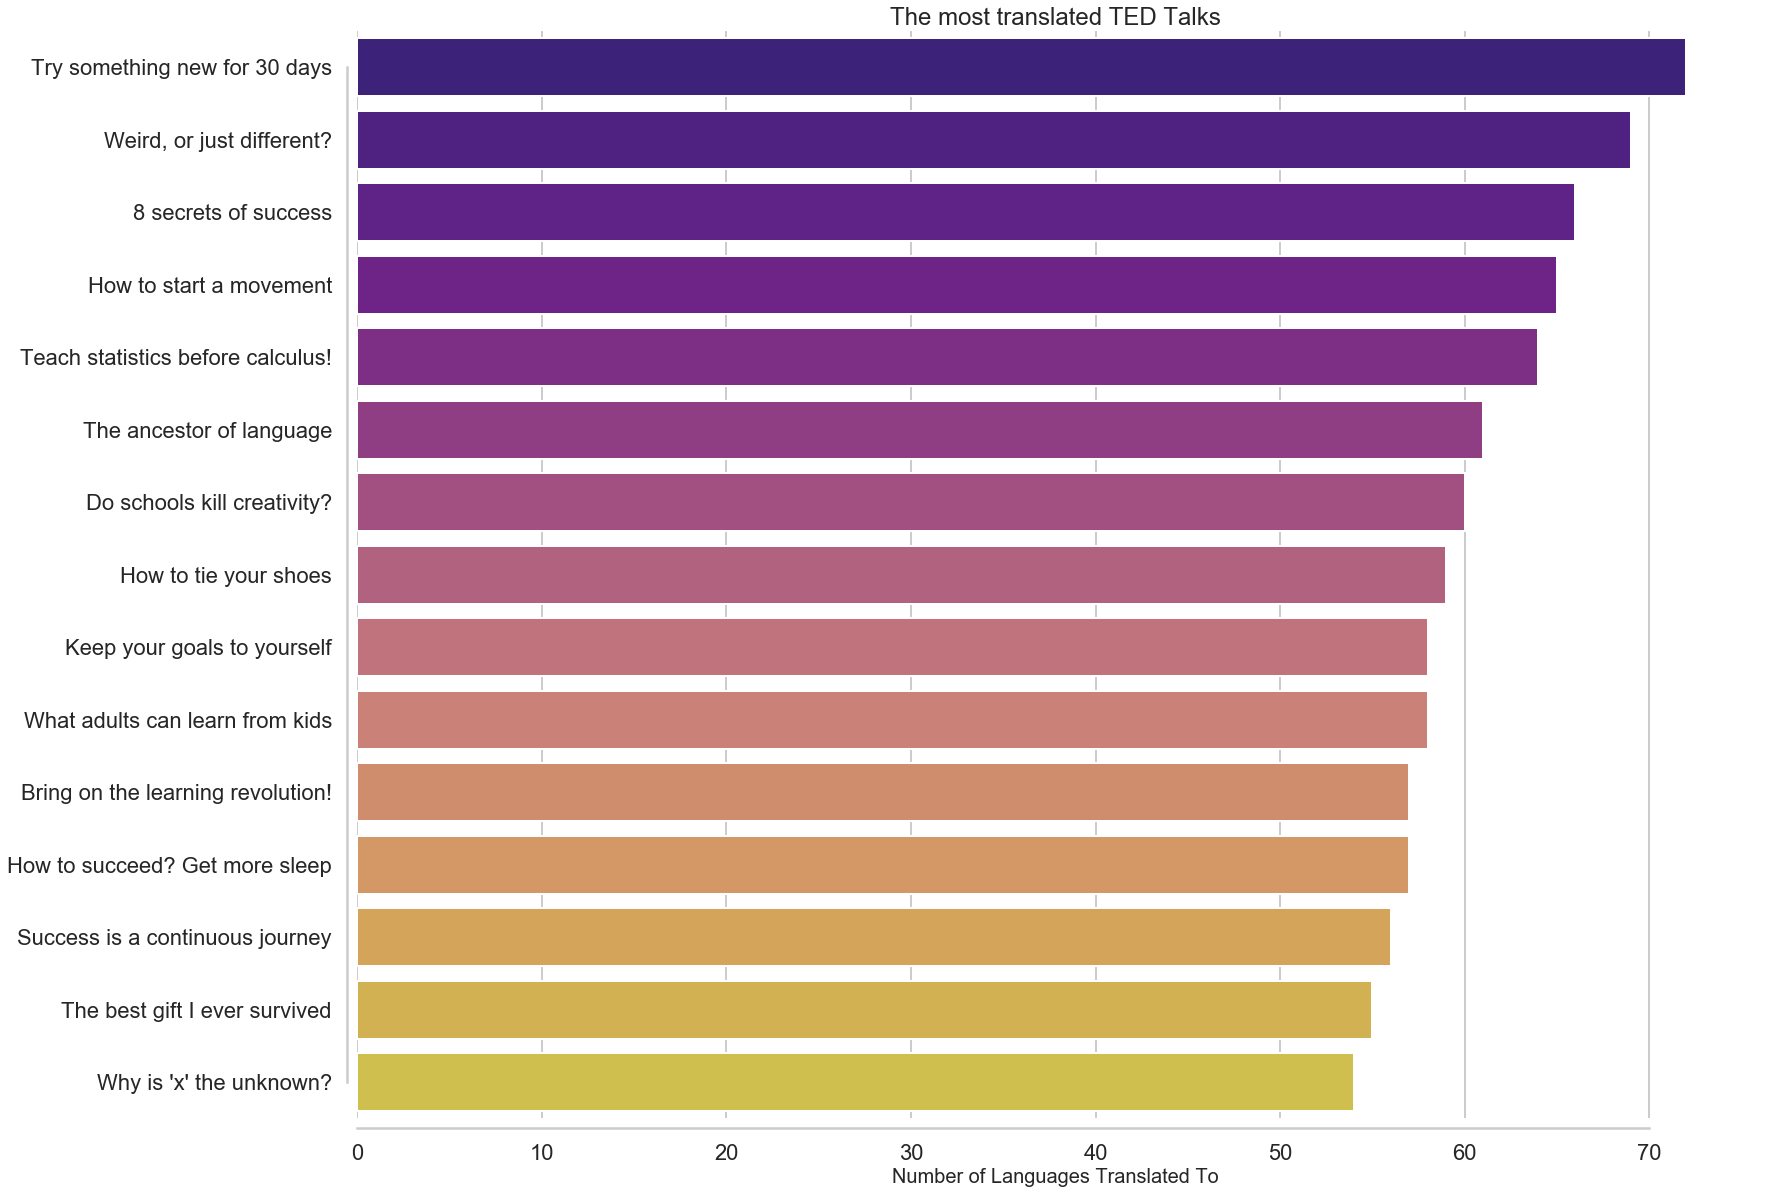

In [87]:
sns.set(style='whitegrid',context='poster')

plt.figure(figsize=(25,20))
sns.barplot(x=most_translated.languages,y=most_translated.title,saturation=0.6,palette='plasma')

plt.title('The most translated TED Talks')
plt.xlabel('Number of Languages Translated To',fontsize=20)
plt.ylabel('')
sns.despine(offset=10,trim=True)
plt.show()

<h4 style="font-size:1.5em;color:#FF33EC">What are the most used words in TED Talks</h4>

In [88]:
transcripts=pd.read_csv('transcripts.csv')
transcripts.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [89]:
type(transcripts.transcript[0])

str

In [90]:
#a function to add all transcript into one text blob, making lower case to include all words
#transcripts_text=transcripts['transcript'].str.cat(sep=' ').lower()

In [91]:
transcripts_text=transcripts['transcript'].str.cat(sep=' ').lower()

In [92]:
transcripts_text[:100]

"good morning. how are you?(laughter)it's been great, hasn't it? i've been blown away by the whole th"

In [93]:
for char in string.punctuation:
    transcripts_text=transcripts_text.replace(char,' ')

In [94]:
'_' in transcripts_text

False

In [95]:
#tokenizing all words
nltk.download("punkt")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fayal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fayal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
transcripts_words=nltk.word_tokenize(transcripts_text)

In [98]:
useless_words=nltk.corpus.stopwords.words("english")+list(string.punctuation)
type(useless_words)

list

In [99]:
list(string.punctuation)[-7:]

['^', '_', '`', '{', '|', '}', '~']

In [100]:
def build_bag_of_words(words):
    filtered_words=[word for word in words if not word in useless_words]
    return filtered_words

In [101]:
filtered=build_bag_of_words(transcripts_words)

In [102]:
filtered=[word for word in filtered if word!='—']

In [103]:
word_counter=Counter(filtered)
word_counter.most_common()[:30]

[('one', 20208),
 ('people', 19733),
 ('like', 19203),
 ('know', 13017),
 ('going', 12880),
 ('think', 12124),
 ('see', 11630),
 ('would', 11617),
 ('us', 11048),
 ('really', 11046),
 ('get', 10841),
 ('time', 10540),
 ('laughter', 10353),
 ('world', 10350),
 ('way', 9047),
 ('actually', 8894),
 ('years', 8753),
 ('things', 8585),
 ('could', 8548),
 ('want', 8222),
 ('go', 8090),
 ('well', 8076),
 ('make', 7963),
 ('right', 7687),
 ('first', 7294),
 ('something', 7270),
 ('said', 7223),
 ('two', 7173),
 ('much', 6794),
 ('also', 6692)]

Well, not very interesting. must do pos_tag from nltk. 

<h4 style="font-size:1.5em;color:#FF33EC">Most common word used in comments</h4>

In [104]:
words_in_all_comments=dict()
for x in data['words_of_comments']:
    for key,value in x.items():
        words_in_all_comments[key]=words_in_all_comments.get(key,0)+value


In [105]:
words_in_all_comments

{'Funny': 393895,
 'Beautiful': 490349,
 'Ingenious': 384386,
 'Courageous': 420045,
 'Longwinded': 83344,
 'Confusing': 53436,
 'Informative': 887434,
 'Fascinating': 801119,
 'Unconvincing': 134558,
 'Persuasive': 561220,
 'Jaw-dropping': 377547,
 'OK': 207157,
 'Obnoxious': 66303,
 'Inspiring': 1352048}

In [ ]:
# sorted_w=sorted(words_in_all_comments.items(), key=lambda x:x[1])
# sorted_w

In [ ]:
# x_word=[sorted_w[i][0] for i in range(len(sorted_w))]
# x_word

In [ ]:
# y_count=[sorted_w[i][1] for i in range(len(sorted_w))]
# y_count

In [106]:
x_word=list(words_in_all_comments.keys())
y_count=list(words_in_all_comments.values())


In [107]:
df_w=pd.DataFrame({'x' :x_word,
                   'y' :y_count,
                   's' :y_count,
                   'g' :x_word})
df_w

,x,y,s,g
0,Funny,393895,393895,Funny
1,Beautiful,490349,490349,Beautiful
2,Ingenious,384386,384386,Ingenious
3,Courageous,420045,420045,Courageous
4,Longwinded,83344,83344,Longwinded
5,Confusing,53436,53436,Confusing
6,Informative,887434,887434,Informative
7,Fascinating,801119,801119,Fascinating
8,Unconvincing,134558,134558,Unconvincing
9,Persuasive,561220,561220,Persuasive


In [108]:


# sns.set(style='darkgrid',context='talk',font_scale=0.8)
# text(x,y)
# plt.figure(figsize=(20,10))
# plt.scatter(x_words,y_count)

# plt.title('The most translated TED Talks')
# plt.xlabel('',fontsize=10)
# plt.ylabel('')
# #sns.despine(offset=10,trim=True)
# plt.show()

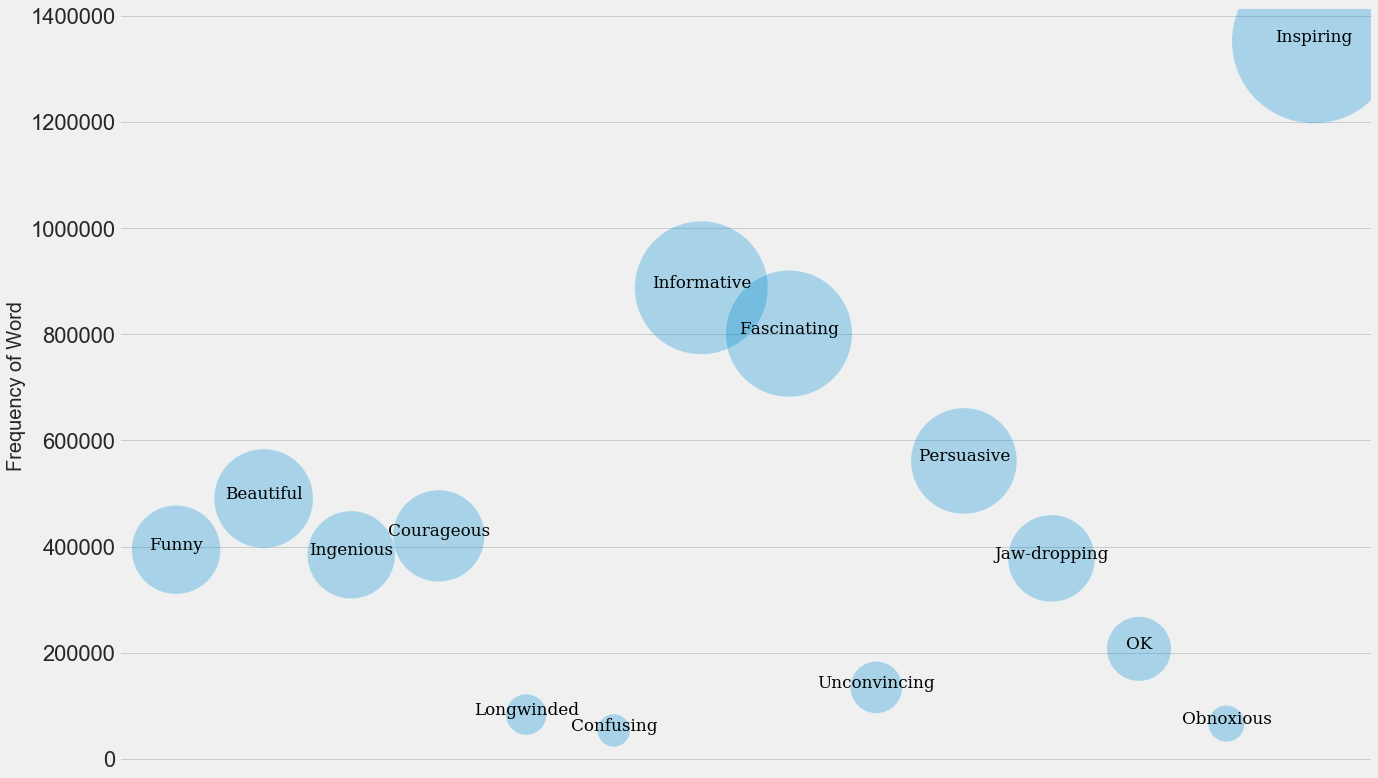

In [109]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,13))

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df_w.x, df_w.y, alpha = 0.3,s = df_w.s/50)
#ax.set(yscale="log")
for line in range(0,df_w.shape[0]):
    ax.text(df_w.x[line], df_w.y[line], df_w.g[line], horizontalalignment='center', family='serif',size='large', fontstyle='normal',color='black', weight='light')
    
ax.get_xaxis().set_visible(False)

#plt.xlabel('Comment',fontsize=15)
plt.ylabel('Frequency of Word',fontsize=20)

plt.savefig('buuble_comments.jpeg')
plt.show()

<h4 style="font-size:1.5em;color:#FF33EC">Sentiment Analysis For Comments-Model 1</h4>

We need to build a model for sentiment analysis for each TED Talk.

We will use the model presented in lecture.

The model is saved in a pickle file.


In [150]:
data.words_of_comments[2482]

{'Inspiring': 145,
 'Informative': 57,
 'Courageous': 130,
 'Beautiful': 56,
 'Persuasive': 62,
 'Jaw-dropping': 19,
 'Fascinating': 40,
 'Ingenious': 7,
 'Funny': 3,
 'OK': 1}

In [157]:
#leaning the tags with 0 frequency
for i in range(data.words_of_comments.shape[0]):
    for key,value in data.words_of_comments[i].copy().items():
        if value==0:
            del data.words_of_comments[i][key]
        

In [111]:
classifier_f=open("naivebayes.pickle","rb")
sentiment_classifier_one=pickle.load(classifier_f)
classifier_f.close()

In [112]:
sentiment_classifier_one.classify(data.words_of_comments[0])

'pos'

In [113]:
data['sentiment_of_comments']='sentiment'
for i in range(data['sentiment_of_comments'].shape[0]):
    data['sentiment_of_comments'][i]=sentiment_classifier_one.classify(data.words_of_comments[i])

C:\Users\fayal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


data['sentiment_of_comments_1'].value_counts()



<h4 style="font-size:1.5em;color:#FF33EC">Sentiment Analysis For Comments-Model 2</h4>

In [115]:
nltk.download("twitter_samples")
from nltk.corpus import twitter_samples

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\fayal\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [116]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [117]:
positive_tweet=twitter_samples.tokenized('positive_tweets.json')

In [118]:
negative_tweet=twitter_samples.tokenized('negative_tweets.json')

The twitter_samples object has a `tokenized()` method that returns all tweets from a fileid already individually tokenized. Read its documentation and use it to find the number of positive and negative tweets.

In [119]:
def build_bag_of_words_features_filtered(words):
    """Build a bag of words model"""
   
    return {word:1 for word in words if not word in useless_words}

In [120]:
positive_features=[(build_bag_of_words_features_filtered(tweet),'pos')  for tweet in positive_tweet]

In [121]:
len(positive_features)

5000

In [122]:
negative_features=[(build_bag_of_words_features_filtered(tweet),'neg')  for tweet in negative_tweet]

In [123]:
len(negative_features)

5000

In [124]:
split = int(len(positive_features) * 0.8)

In [125]:
split

4000

In [126]:
sentiment_classifier_two = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

In [127]:
nltk.classify.util.accuracy(sentiment_classifier_two, positive_features[:split]+negative_features[:split])*100

99.9625

In [128]:
nltk.classify.util.accuracy(sentiment_classifier_two, positive_features[split:]+negative_features[split:])*100

99.35000000000001

In [129]:
sentiment_classifier_two.show_most_informative_features()

Most Informative Features
                      :( = 1                 neg : pos    =   2362.3 : 1.0
                      :) = 1                 pos : neg    =   1139.0 : 1.0
                     See = 1                 pos : neg    =     37.7 : 1.0
                     TOO = 1                 neg : pos    =     36.3 : 1.0
                  THANKS = 1                 neg : pos    =     35.0 : 1.0
                    THAT = 1                 neg : pos    =     27.7 : 1.0
                    miss = 1                 neg : pos    =     26.4 : 1.0
                     sad = 1                 neg : pos    =     25.0 : 1.0
                     x15 = 1                 neg : pos    =     23.7 : 1.0
                   Thank = 1                 pos : neg    =     22.3 : 1.0


In [158]:
data['sentiment_of_comments_2']='sentiment'

for i in range(data['sentiment_of_comments_2'].shape[0]):
    data['sentiment_of_comments_2'][i]=sentiment_classifier_two.classify(data.words_of_comments[i])

C:\Users\fayal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [164]:
data=data.rename(columns={'sentiment_of_comments':'sentiment_of_comments_1'})

In [161]:
data['sentiment_of_comments_2'].value_counts()

pos    2542
neg       8
Name: sentiment_of_comments_2, dtype: int64

In [168]:
print(data[data['sentiment_of_comments_2']=='neg'].words_of_comments[2542])

{'Beautiful': 41, 'Courageous': 43, 'Inspiring': 35, 'Informative': 15, 'Jaw-dropping': 3, 'Unconvincing': 5, 'Ingenious': 7, 'Fascinating': 14, 'Persuasive': 2, 'Funny': 6, 'Obnoxious': 5, 'Confusing': 1, 'OK': 1, 'Longwinded': 3}
